# Stock Market Analysis of Maruthi using Time Series Forecast

## Time series data
Time series data is a sequence of data points in chronological order that is used by businesses to analyze past data and make future predictions. These data points are a set of observations at specified times and equal intervals, typically with a datetime index and corresponding value. Common examples of time series data in our day-to-day lives include:

* Measuring weather temperatures
* Measuring the number of taxi rides per month
* Predicting a company’s stock prices for the next day

## Components of Time Series

Time series data consist of four components:

* Trend Component: This is a variation that moves up or down in a reasonably predictable pattern over a long period.

* Seasonality Component: is the variation that is regular and periodic and repeats itself over a specific period such as day, week, month, season, etc.,

* Cyclical Component: is the variation that corresponds with business or economic 'boom-bust' cycles or follows their own peculiar cycles, and

* Random Component: is the variation that is erratic or residual and does not fall under any of the above three classifications.

### Importing necessary libraries

In [1]:
# Importing required modules

import pandas as pd          
import numpy as np               # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

### A first look at Maruti’s stock Prices

In [2]:
df = pd.read_csv("C:/Users/MILAN/Downloads/archive (32)/MARUTI.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [3]:
# For the sake of this notebook, I shall limit the number of columns to keep things simple. 

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4427 non-null   object 
 1   Open    4427 non-null   float64
 2   High    4427 non-null   float64
 3   Low     4427 non-null   float64
 4   Close   4427 non-null   float64
 5   Volume  4427 non-null   int64  
 6   VWAP    4427 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 242.2+ KB


In [5]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
3,2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
4,2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

* The Open and Close columns indicate the opening and closing price of the stocks on a particular day.
* The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
* The Volume column tells us the total volume of stocks traded on a particular day.

The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.

### Pandas for time series analysis
As pandas was developed in the context of financial modeling, it contains a comprehensive set of tools for working with dates, times, and time-indexed data. Let’s look at the main pandas data structures for working with time series data.

### Manipulating datetime
Python's basic objects for working with dates and times reside in the built-in datetime module. In pandas, a single point in time is represented as a Timestamp and we can use datetime() function to create Timestamps from strings in a wide variety of date/time formats.

In [6]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [7]:
test_date = datetime(my_year, my_month, my_day)
test_date

datetime.datetime(2019, 4, 21, 0, 0)

In [8]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [9]:
print(data.index.max())
print(data.index.min())

4426
0


In [10]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())

Earliest date index location is:  0
Latest date location:  4426


### Feature Extraction
Let's extract time and date features from the Date column. Since the volume weighted average price (VWAP) is a trading benchmark, we shall limit our analysis to only that column.

In [11]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.head()

,Date,VWAP
0,2003-07-09,165.95
1,2003-07-10,166.74
2,2003-07-11,172.45
3,2003-07-14,177.91
4,2003-07-15,176.88


In [12]:
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


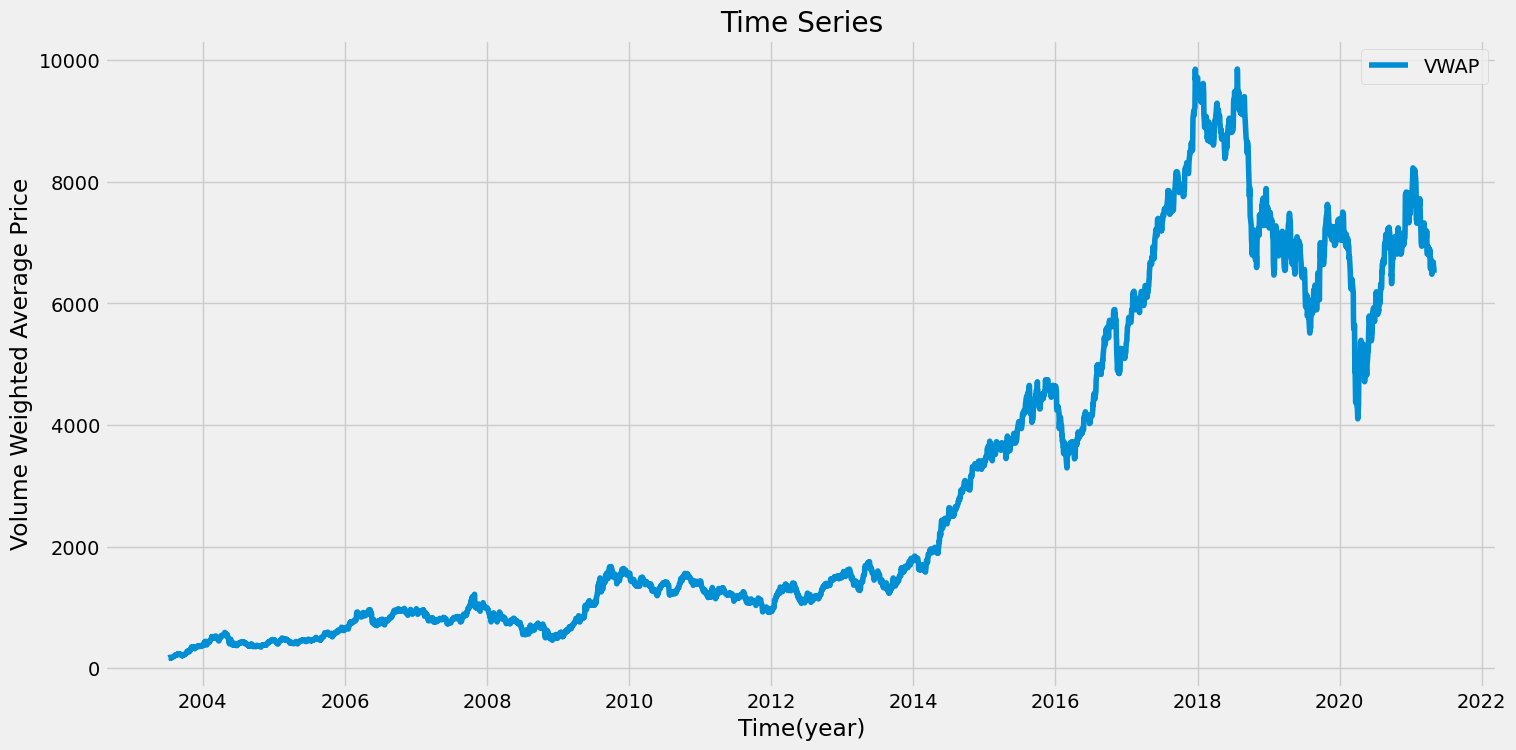

In [13]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap['VWAP'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

## Exploratory Data Analysis

Let's explore the data and look at details at year, month and day level

<Axes: xlabel='year'>

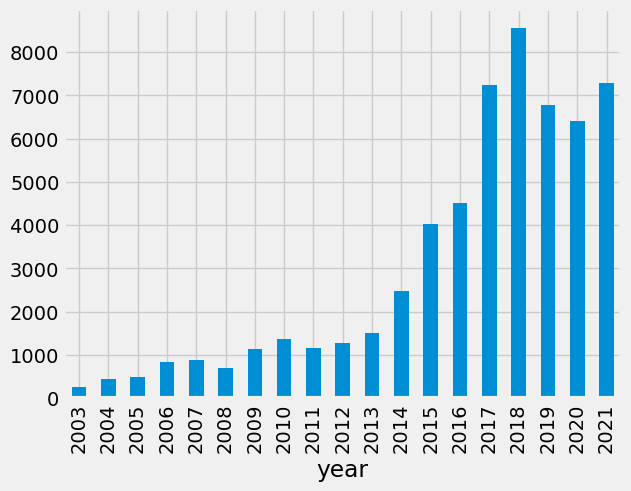

In [14]:
# Yearly VWAP of Maruti Stocks

df_vwap.groupby('year')['VWAP'].mean().plot.bar()

<Axes: xlabel='month'>

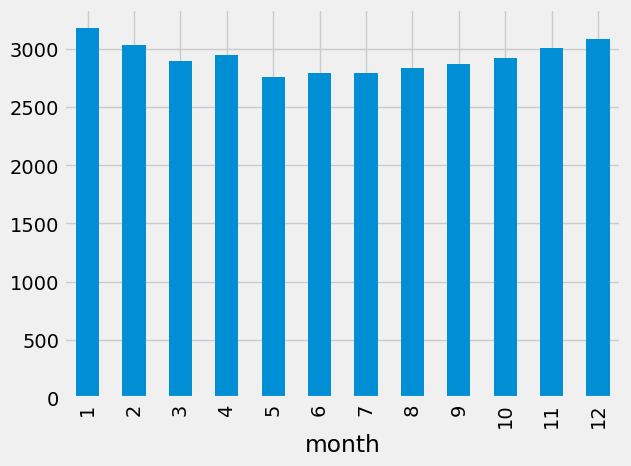

In [15]:
# Monthly VWAP of Maruti Stocks

df_vwap.groupby('month')['VWAP'].mean().plot.bar()

<Axes: xlabel='day'>

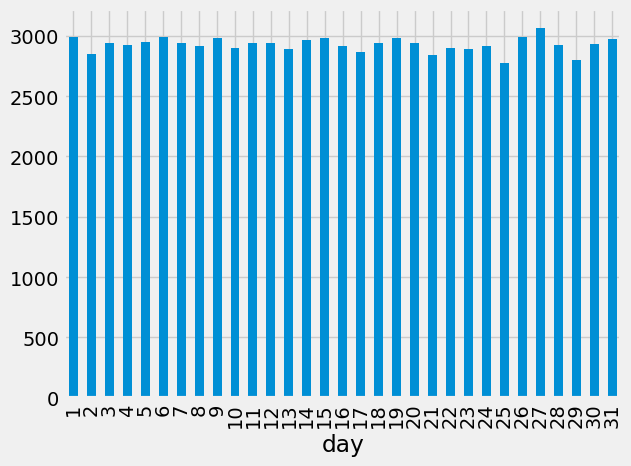

In [16]:
# Daily VWAP of Maruti Stocks

df_vwap.groupby('day')['VWAP'].mean().plot.bar()

<Axes: xlabel='day of week'>

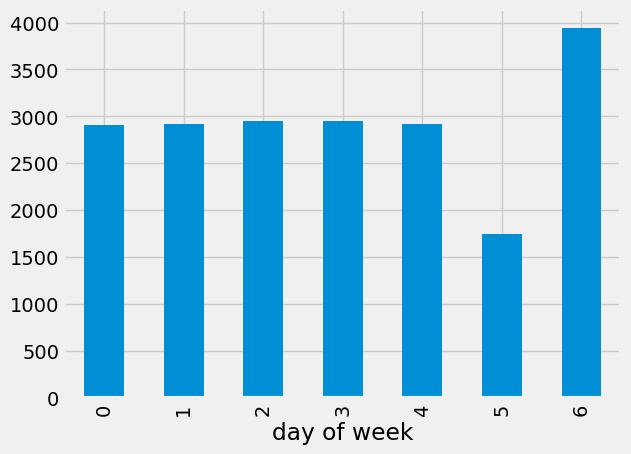

In [17]:
# Analysing w.r.t day of the week

df_vwap.groupby('day of week')['VWAP'].mean().plot.bar()

## Time resampling

Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting market trends. To make it easier, we use a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.

The pandas library has a resample() function which resamples such time series data. The resample method in pandas is similar to its groupby method as it is essentially grouping according to a certain time span. The resample() function looks like this:

In [18]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


To summarize what happened above:

* data.resample() is used to resample the stock data.
* The ‘A’ stands for year-end frequency, and denotes the offset values by which we want to resample the data.
* mean() indicates that we want the average stock price during this period.

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

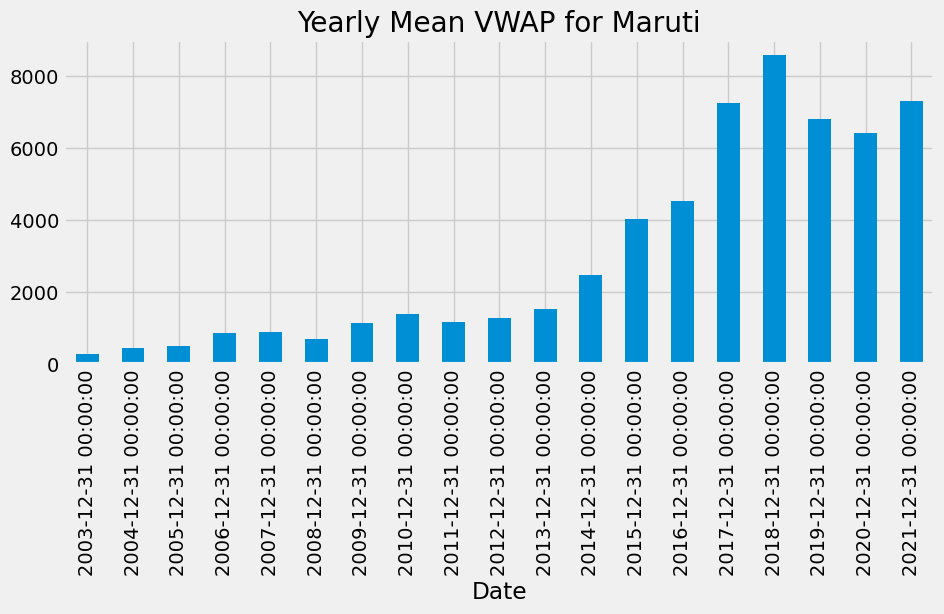

In [19]:
df_vwap['VWAP'].resample('A').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean VWAP for Maruti')

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

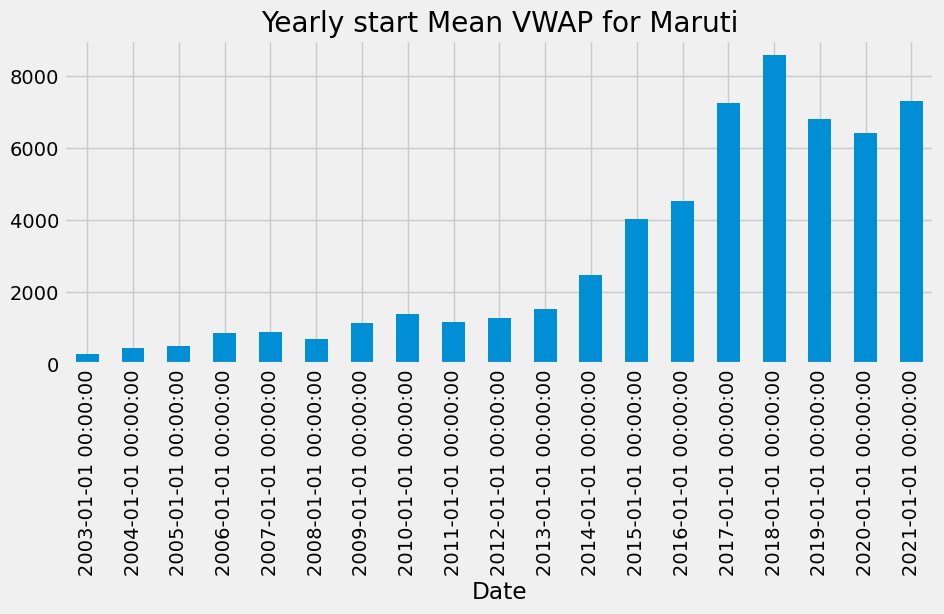

In [20]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')

## Time Shifting

Sometimes, we may need to shift or move the data forward or backwards in time. This shifting is done along a time index by the desired number of time-frequency increments.Here is the original dataset before any time shifts.c

In [21]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


## Forward Shifting

To shift our data forward, we will pass the desired number of periods (or increments) through the shift() function, which needs to be positive value in this case. Let's move our data forward by one period or index, which means that all values which earlier corresponded to row N will now belong to row N+1. Here is the output:

In [22]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,165.95,2003.0,7.0,9.0,2.0
2003-07-11,166.74,2003.0,7.0,10.0,3.0
2003-07-14,172.45,2003.0,7.0,11.0,4.0
2003-07-15,177.91,2003.0,7.0,14.0,0.0


### Backwards shifting
To shift our data backwards, the number of periods (or increments) must be negative.

### Shifting based off time string code

We can also use the offset from the offset table for time shifting. For that, we will use the pandas shift() function. We only need to pass in the periods and freq parameters. The period attribute defines the number of steps to be shifted, while the freq parameters denote the size of those steps.

Let’s say we want to shift the data three months forward:

In [23]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-09-30,165.95,2003,7,9,2
2003-09-30,166.74,2003,7,10,3
2003-09-30,172.45,2003,7,11,4
2003-09-30,177.91,2003,7,14,0
2003-09-30,176.88,2003,7,15,1


### Rolling windows

Time series data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data. Here is a visualization of the Amazon’s adjusted close price over the years where we can see such noise:

<Axes: xlabel='Date'>

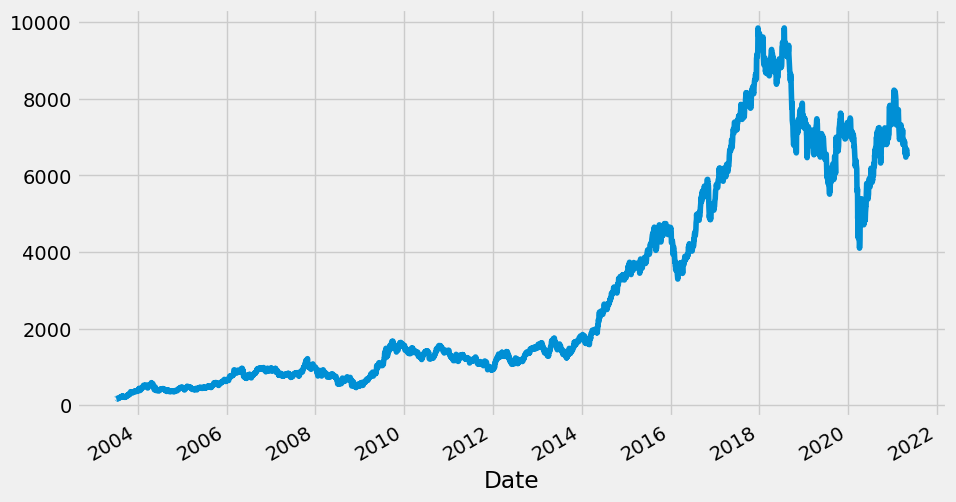

In [24]:
df_vwap['VWAP'].plot(figsize = (10,6))

In [25]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


<Axes: xlabel='Date'>

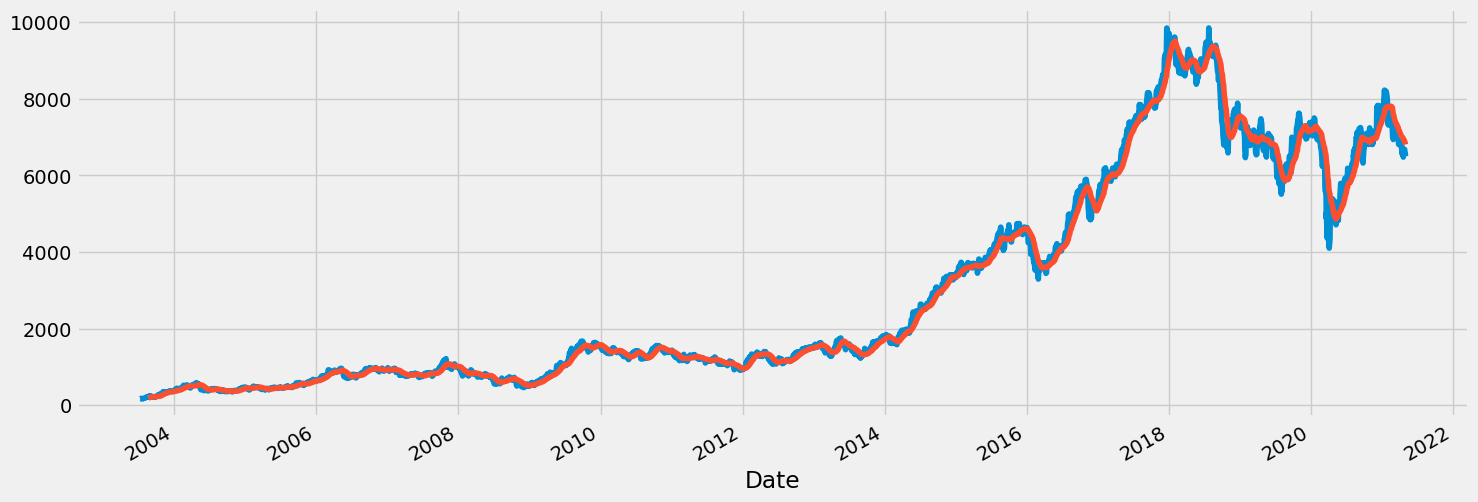

In [26]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

## Conclusion

Python’s pandas library is a powerful, comprehensive library with a wide variety of inbuilt functions for analyzing time series data. In this article, we saw how pandas can be used for wrangling and visualizing time series data.

We also performed tasks like time sampling, time shifting and rolling with stock data. These are usually the first steps in analyzing any time series data. Going forward, we could use this data to perform a basic financial analysis by calculating the daily percentage change in stocks to get an idea about the volatility of stock prices. Another way we could use this data would be to predict Maruti’s stock prices for the next few days by employing machine learning techniques. This would be especially helpful from the shareholder’s point of view.